In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

In [7]:
num_trials = 2000
bandit_probabilities = [0.2, 0.5, 0.75]

current samples: ['0.4871', '0.6960', '0.6195']


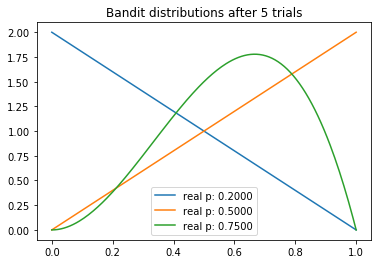

current samples: ['0.3884', '0.7167', '0.3615']


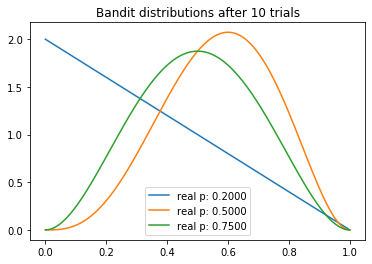

current samples: ['0.0718', '0.4102', '0.6111']


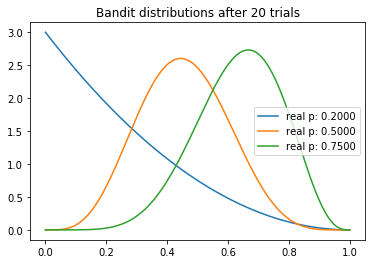

current samples: ['0.0896', '0.5211', '0.7746']


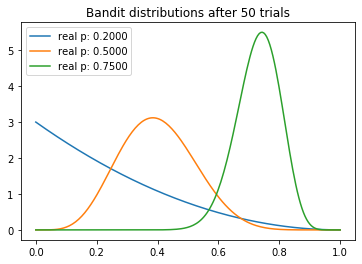

current samples: ['0.2838', '0.3704', '0.7113']


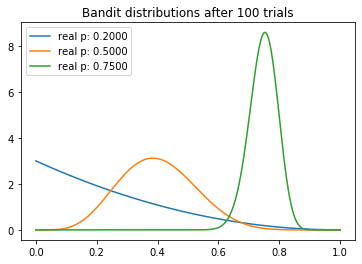

current samples: ['0.0424', '0.3294', '0.7379']


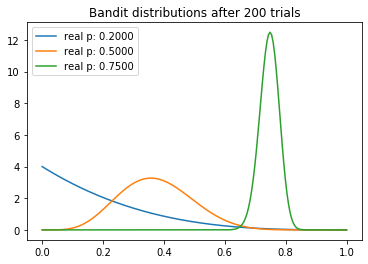

current samples: ['0.0455', '0.4759', '0.7073']


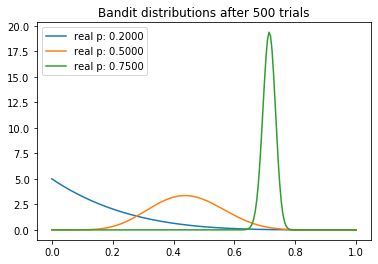

current samples: ['0.5257', '0.2789', '0.7268']


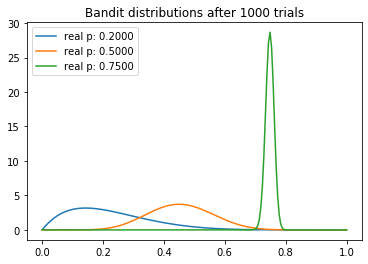

current samples: ['0.1040', '0.5298', '0.7575']


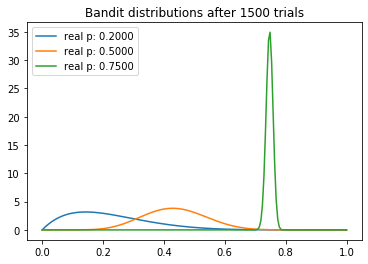

current samples: ['0.2247', '0.4387', '0.7448']


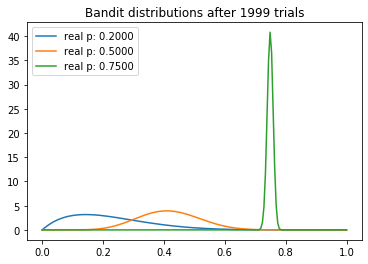

In [8]:
# slot machine
class Bandit:
    def __init__(self, p):
        self.p = p
        self.a = 1
        self.b = 1 #uniform distribution
    def pull(self):
        return np.random.random() < self.p # returns random number
        # less than p we get 1, otherwise get 0
    
    def sample(self):
        return np.random.beta(self.a, self.b) # sample from current beta dist
    
    #update
    def update(self,x):
        self.a += x
        self.b += 1-x

# plot all the bandits
def plot(bandits,trial):
    x = np.linspace(0,1,200)
    for b in bandits:
        y = beta.pdf(x,b.a,b.b)
        plt.plot(x,y, label = "real p: %.4f" % b.p)
    plt.title("Bandit distributions after %s trials" % trial)
    plt.legend()
    plt.show()

def experiment():
    bandits = [Bandit(p) for p in bandit_probabilities]
    
    sample_points=[5,10,20,50,100,200,500,1000,1500,1999]
    for i in range(num_trials):
        bestb = None # bandit whose arm we eventually pull
        maxsample = -1
        allsamples= []
        for b in bandits:
            sample = b.sample() #sample from bandit
            allsamples.append('%.4f' % sample) 
            if sample > maxsample:
                maxsample = sample # keep track of the max
                bestb = b
        if i in sample_points:
            print("current samples: %s" % allsamples)
            plot(bandits, i)
        
        x = bestb.pull()
        bestb.update(x)
        

if __name__ == "__main__":
  experiment()

        